## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 150)

import gc
import os

# matplotlib and seaborn for plotting
import matplotlib
matplotlib.rcParams['figure.dpi'] = 120 #resolution
matplotlib.rcParams['figure.figsize'] = (8,6) #figure size

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
color = sns.color_palette()

root = 'C:/Data/instacart-market-basket-analysis/'

In [2]:
aisles = pd.read_csv(root + 'aisles.csv')
departments = pd.read_csv(root + 'departments.csv')
orders = pd.read_csv(root + 'orders.csv')
order_products_prior = pd.read_csv(root + 'order_products__prior.csv')
order_products_train = pd.read_csv(root + 'order_products__train.csv')
products = pd.read_csv(root + 'products.csv')

Let's combine aisles, department and products files with order_products_prior and order_products_train.

In [3]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [10]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


#### Merging of Dataframes

In [11]:
order_products_prior = order_products_prior.merge(products, on ='product_id', how='left').merge(aisles, on ='aisle_id', how='left').merge(departments, on ='department_id', how='left')
order_products_train = order_products_train.merge(products, on ='product_id', how='left').merge(aisles, on ='aisle_id', how='left').merge(departments, on ='department_id', how='left')

### order_products_prior

In [12]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


#### Products

In [141]:
temp_df = order_products_prior.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()

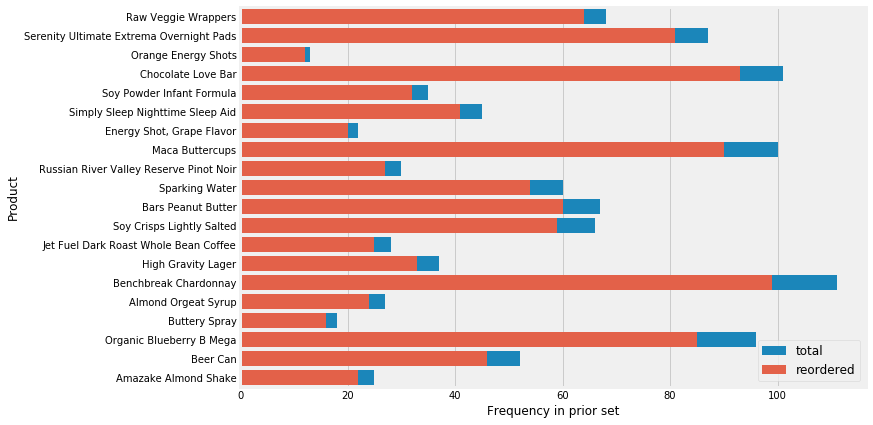

In [166]:
ax, fig = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.total[0:20], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.reorders[0:20], color=color[1], label = "reordered")
ax.set_ylabel("Product")
ax.set_xlabel("Frequency in prior set")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [153]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()

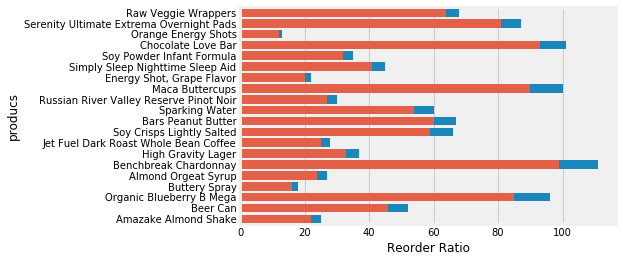

In [167]:
ax, fig = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.total[0:20], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.reorders[0:20], color=color[1], label = "reordered")
ax.set_ylabel("producs")
ax.set_xlabel("Reorder Ratio")
plt.show()

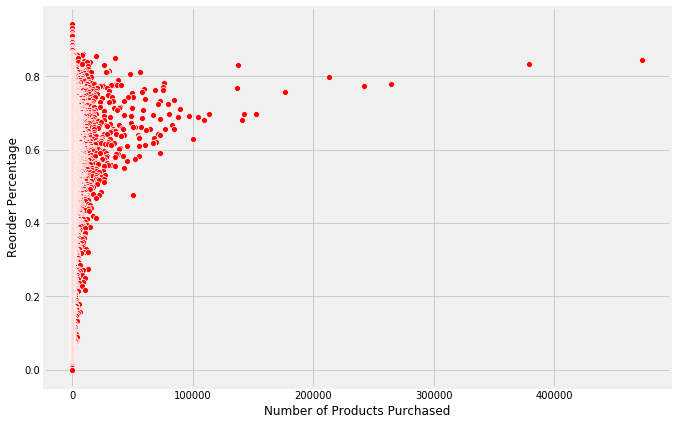

In [163]:
ax, fig = plt.subplots(figsize=(10,7))
ax = sns.scatterplot(x = temp_df.total, y = temp_df.reorder_ratio, color = "red")
ax.set_xlabel("Number of Products Purchased")
ax.set_ylabel("Reorder Percentage")
plt.show()

#### Aisle

In [168]:
temp_df = order_products_prior.groupby("aisle")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()

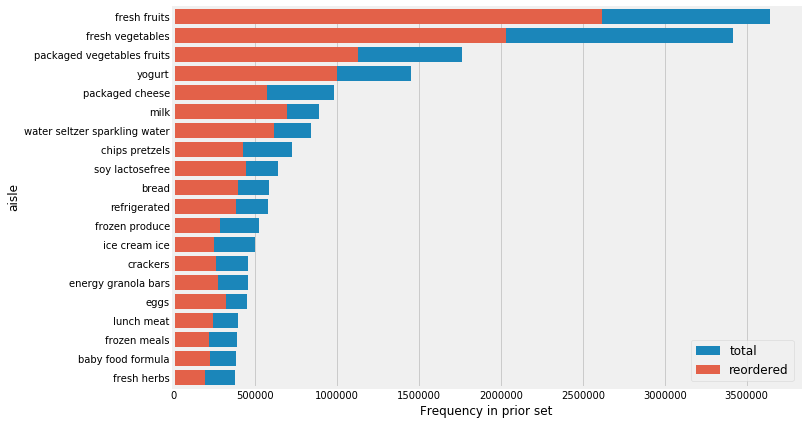

In [169]:
ax, fig = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.total[0:20], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.reorders[0:20], color=color[1], label = "reordered")
ax.set_ylabel("aisle")
ax.set_xlabel("Frequency in prior set")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [170]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()

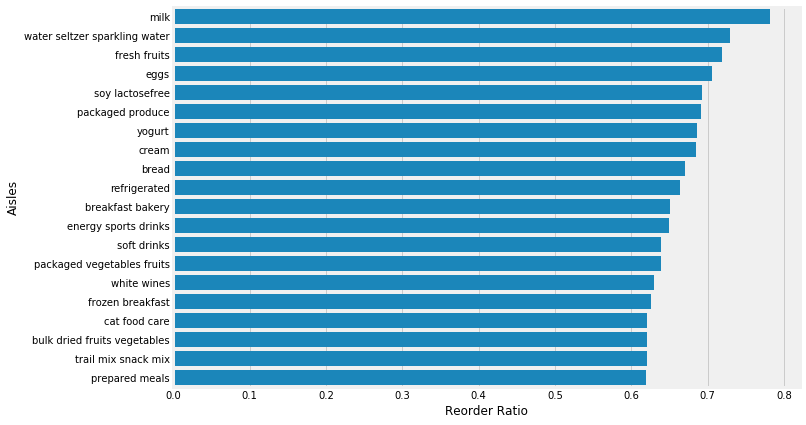

In [172]:
ax, fig = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.reorder_ratio[0:20], color=color[0])
ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
plt.show()

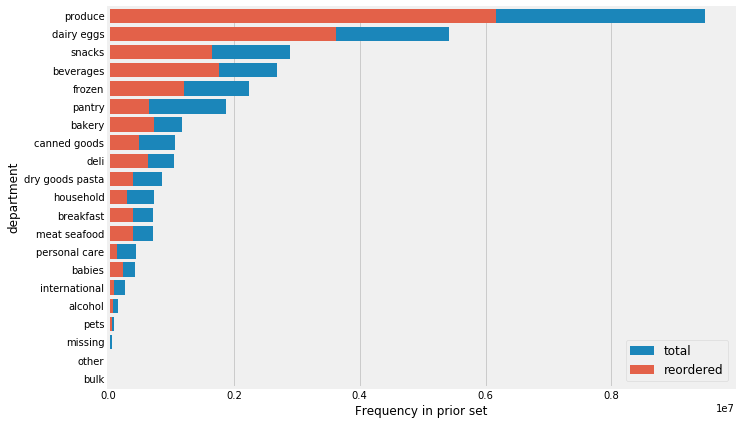

In [120]:
temp_df = order_products_prior.groupby("department")["reordered"].agg(['count', 'sum'])
temp_df = temp_df.sort_values('count', ascending=False).reset_index()

ax, fig = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = temp_df.department, x = temp_df["count"], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.department, x = temp_df["sum"], color=color[1], label = "reordered")
ax.set_ylabel("department")
ax.set_xlabel("Frequency in prior set")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

### order_products_train

In [13]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods


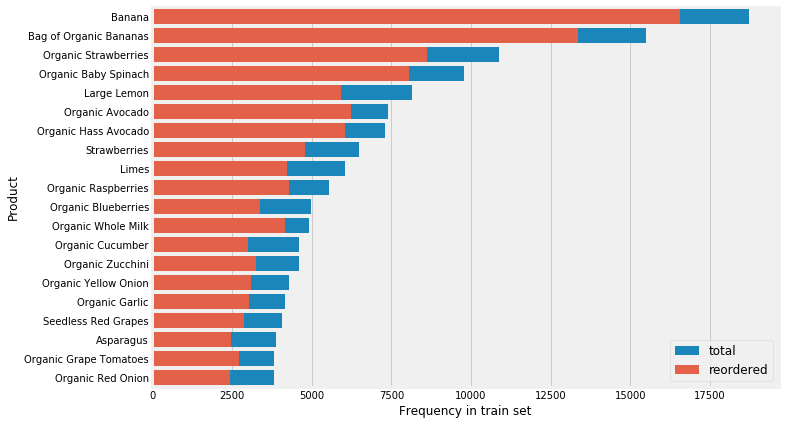

In [118]:
temp_df = order_products_train.groupby("product_name")["reordered"].agg(['count', 'sum'])
temp_df = temp_df.sort_values('count', ascending=False).reset_index().head(20)

ax, fig = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = temp_df.product_name, x = temp_df["count"], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.product_name, x = temp_df["sum"], color=color[1], label = "reordered")
ax.set_ylabel("Product")
ax.set_xlabel("Frequency in train set")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

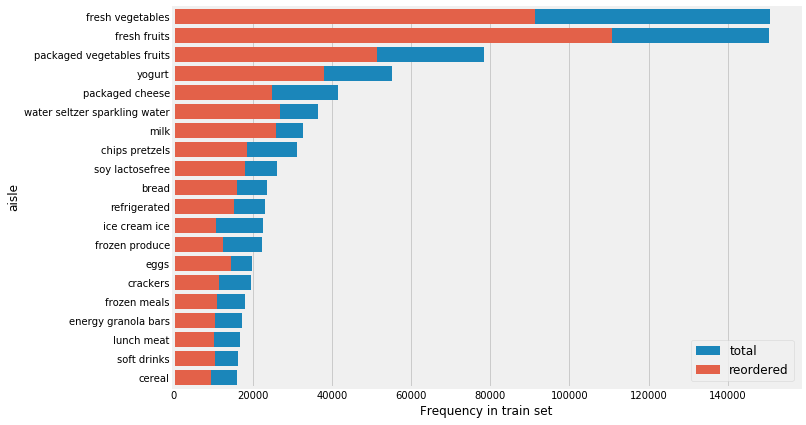

In [121]:
temp_df = order_products_train.groupby("aisle")["reordered"].agg(['count', 'sum'])
temp_df = temp_df.sort_values('count', ascending=False).reset_index().head(20)

ax, fig = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = temp_df.aisle, x = temp_df["count"], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.aisle, x = temp_df["sum"], color=color[1], label = "reordered")
ax.set_ylabel("aisle")
ax.set_xlabel("Frequency in train set")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

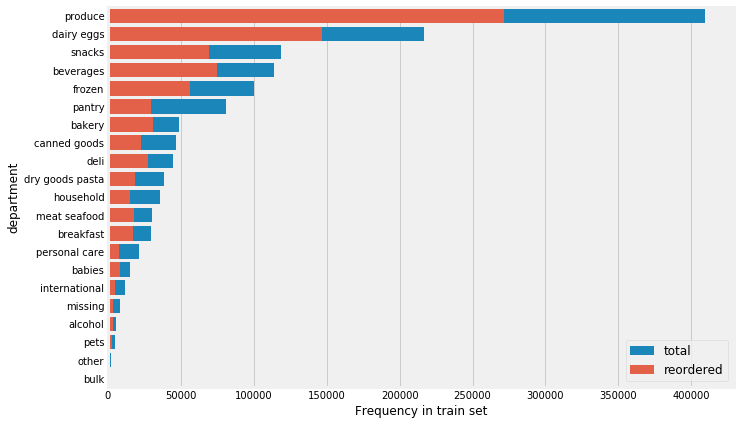

In [122]:
temp_df = order_products_train.groupby("department")["reordered"].agg(['count', 'sum'])
temp_df = temp_df.sort_values('count', ascending=False).reset_index()

ax, fig = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = temp_df.department, x = temp_df["count"], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.department, x = temp_df["sum"], color=color[1], label = "reordered")
ax.set_ylabel("department")
ax.set_xlabel("Frequency in train set")
ax.legend(loc = 4, prop={'size': 12})
plt.show()